In [1]:
%pip install opencv-python
%pip install ipywidgets
%pip install ipympl
%pip install lmfit

In [2]:
import cabervideo as cv
import pandas as pd
import ipywidgets

In [29]:
import importlib
import cabervideo #import the module here, so that it can be reloaded.
importlib.reload(cabervideo)

<module 'cabervideo' from '/drive/capillary_breakup/cabervideo.py'>

In [30]:
upload = ipywidgets.FileUpload(accept='.mp4', multiple=False)
display(upload)

FileUpload(value=(), accept='.mp4', description='Upload')

In [31]:
try:
    with open(upload.value[0]['name'], 'wb') as output_file: 
        output_file.write(upload.value[0]['content']) 
except Exception as e:
    print(f'Error: failed to save uploaded video. Details: {str(e)}')
    pass

Error: failed to save uploaded video. Details: tuple index out of range


In [32]:
test_video=cv.CaberVideo('6000cp_viscosity_standard.mp4')

In [33]:
import matplotlib.pyplot as plt
import ipywidgets as widgets


import matplotlib.pyplot as plt
import ipywidgets as widgets




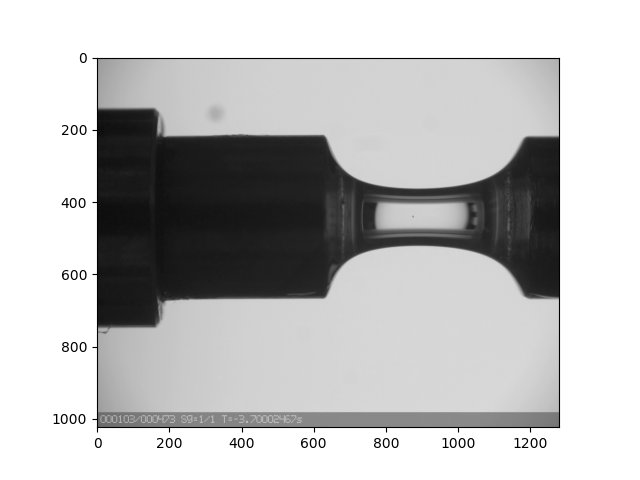

In [34]:
%matplotlib ipympl
test_video.reset_mask()
bs = cv.bbox_select(test_video[100])

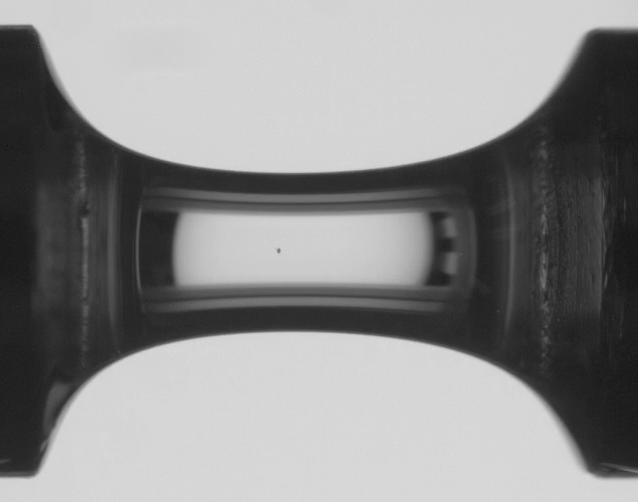

In [35]:
test_video.mask=bs.mask
test_video.show_frame(100)

In [36]:
test_video.show_video_widget()

In [37]:
res_table=test_video.find_radius_all()

In [38]:
res_table

,frame_num,radius_pixels,filename
0,0,415,6000cp_viscosity_standard.mp4
1,1,415,6000cp_viscosity_standard.mp4
2,2,415,6000cp_viscosity_standard.mp4
3,3,415,6000cp_viscosity_standard.mp4
4,4,415,6000cp_viscosity_standard.mp4
...,...,...,...
463,463,0,6000cp_viscosity_standard.mp4
464,464,0,6000cp_viscosity_standard.mp4
465,465,0,6000cp_viscosity_standard.mp4
466,466,0,6000cp_viscosity_standard.mp4


<AxesSubplot:>

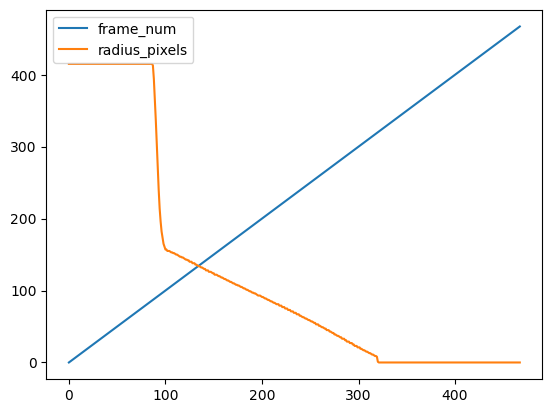

In [39]:
%matplotlib inline
res_table.plot()

In [40]:
res_table=cv.calibrate_res_table(res_table)
res_table

,frame_num,radius_pixels,filename,strike_len_s,fps,t_s,radius_m
0,0,415,6000cp_viscosity_standard.mp4,20.0,100,0.00,0.005485
1,1,415,6000cp_viscosity_standard.mp4,20.0,100,0.01,0.005485
2,2,415,6000cp_viscosity_standard.mp4,20.0,100,0.02,0.005485
3,3,415,6000cp_viscosity_standard.mp4,20.0,100,0.03,0.005485
4,4,415,6000cp_viscosity_standard.mp4,20.0,100,0.04,0.005485
...,...,...,...,...,...,...,...
463,463,0,6000cp_viscosity_standard.mp4,20.0,100,4.63,0.000000
464,464,0,6000cp_viscosity_standard.mp4,20.0,100,4.64,0.000000
465,465,0,6000cp_viscosity_standard.mp4,20.0,100,4.65,0.000000
466,466,0,6000cp_viscosity_standard.mp4,20.0,100,4.66,0.000000


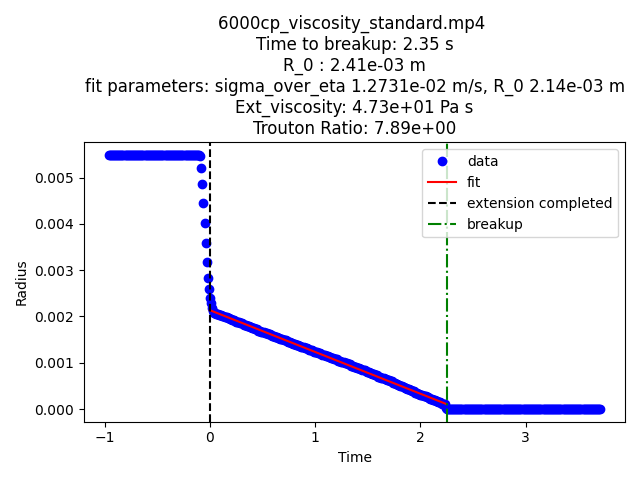

<Figure size 640x480 with 0 Axes>

In [41]:
caber_results=cv.fit_linear_caber(res_table['t_s'], 
                               res_table['radius_m'], 
                               strike_len_s=0.1, 
                               fps=100, 
                               eta_shear=6,
                               surface_tension=40e-3,
                               filename=res_table.filename.loc[0], 
                               show_plot=True)

In [42]:
caber_results

{'time_to_breakup': 2.35,
 'Initial radius exp': 0.0024052863436123347,
 'lmfit_result': <lmfit.model.ModelResult at 0x54ab858>,
 'extensional_viscosity_pas': 47.334897398424914,
 'trouton_ration': 7.889149566404153}